<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab5_low_high_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image = cv2.imread('/content/drive/MyDrive/research_dataset/BSD100/300091.png', cv2.IMREAD_GRAYSCALE)


# Discrete Fourier Transform

In [7]:
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted))

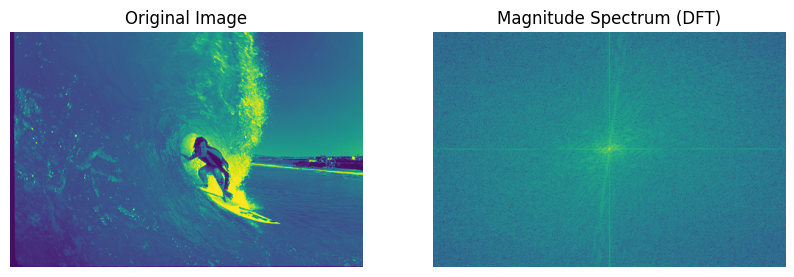

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum)
plt.title('Magnitude Spectrum (DFT)')
plt.axis('off')

plt.show()


# Filter Mask

In [11]:
def create_filter_mask(image_shape, cutoff_frequency, filter_type='ILPF'):
    rows, cols = image_shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), dtype=np.uint8)
    radius = cutoff_frequency

    if filter_type == 'ILPF':
        mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    elif filter_type == 'IHPF':
        mask = 1 - mask
        mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

    return mask

In [13]:
image_shape = (256, 256)
cutoff_frequency = 30

ilpf_mask = create_filter_mask(image_shape, cutoff_frequency, filter_type='ILPF')
ihpf_mask = create_filter_mask(image_shape, cutoff_frequency, filter_type='IHPF')


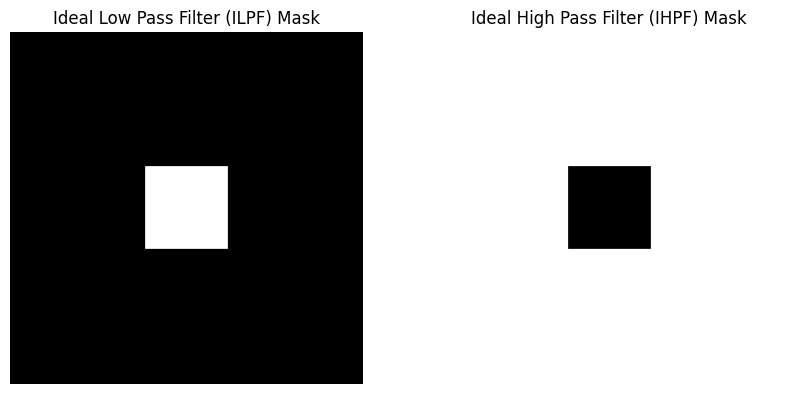

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ilpf_mask, cmap='gray')
plt.title('Ideal Low Pass Filter (ILPF) Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ihpf_mask, cmap='gray')
plt.title('Ideal High Pass Filter (IHPF) Mask')
plt.axis('off')

plt.show()

# element-wise multiplication of the image's Fourier transform

In [16]:
def apply_filter(image, mask):
    dft = np.fft.fft2(image)
    dft_filtered = dft * mask

    return dft_filtered

In [18]:
cutoff_frequency = 30
mask = create_filter_mask(image.shape, cutoff_frequency, filter_type='ILPF')

filtered_dft = apply_filter(image, mask)

magnitude_spectrum_filtered = 20 * np.log(np.abs(np.fft.fftshift(filtered_dft)))

<ipython-input-18-fe61f4ea3be3>:6: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = 20 * np.log(np.abs(np.fft.fftshift(filtered_dft)))


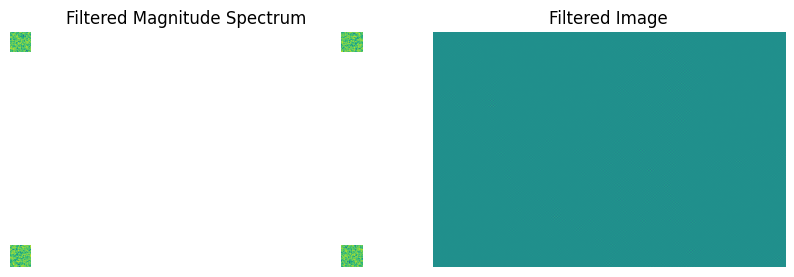

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum_filtered)
plt.title('Filtered Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.fft.ifft2(filtered_dft).real)
plt.title('Filtered Image')
plt.axis('off')

plt.show()

# Inverse Discrete Fourier Transform (IDFT)

In [24]:
filtered_image = np.fft.ifft2(filtered_dft).real

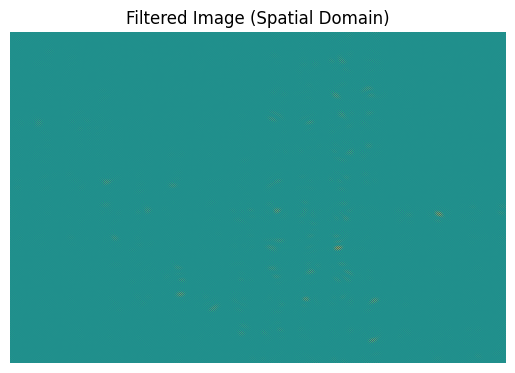

In [25]:
plt.imshow(filtered_image)
plt.title('Filtered Image (Spatial Domain)')
plt.axis('off')
plt.show()